In [3]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [29]:
class Const: 
    def __init__(self):
        self.n_animals_max = 2000
        self.n_animals_start = 10  
        self.n_steps = 500
        self.vmin = 0.01
        self.vmax = 5*self.vmin
        self.v_decay = 0.7
        self.arena_size = 3
        self.hp_baby = 20
        self.hp_food = 5
        self.hp_reproduction = 50
        self.hp_birthcost = 15        
        self.hp_leak = 0.5
        
        self.food_rate = 1*self.arena_size**2
        self.eating_distance = 0.1**2     
        self.n_food_max = 10000
        self.n_food_start = 150*self.arena_size**2

In [30]:
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        hp = np.zeros(c.n_animals_max)
        hp[:c.n_animals_start] = np.random.uniform(
            low=c.hp_baby, high=c.hp_reproduction, size=c.n_animals_start)
        
        x = np.random.uniform(low = 0, high = c.arena_size, size=c.n_animals_max)
        y = np.random.uniform(low = 0, high = c.arena_size, size=c.n_animals_max)
        vx = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.n_animals_max, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.n_animals_max,low=0,high=2) - 1)
        
        # Let there be cabbage!
        foodx = np.ones(c.n_food_max)*-1
        foody = np.ones(c.n_food_max)*-1
        foodx[:c.n_food_start] = np.random.uniform(low=0,high=c.arena_size,size=c.n_food_start)
        foody[:c.n_food_max] = np.random.uniform(low=0,high=c.arena_size,size=c.n_food_max)
        
        n_animals = np.zeros(c.n_steps)

        if show_dotses: # Init plots
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) 
            plt.xlim((0,c.arena_size));
            plt.ylim((0,c.arena_size));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy
            vx = vx*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin 
            vy = vy*c.v_decay + np.random.randn(c.n_animals_max)*c.vmin
    
            # Reflect from the walls
            vx = np.where(np.logical_or(x>c.arena_size,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>c.arena_size,y<0), -vy , vy)
            x = np.maximum(0,np.minimum(x,c.arena_size)) # <------------------- Keep them in enclosure
            y = np.maximum(0,np.minimum(y,c.arena_size))
            
            potential_babies = np.argwhere(hp <= 0)
            baby_counter = 0
            
            for i_animal in range(c.n_animals_max):
                if hp[i_animal]<=0: # Skip dead animals
                    continue
                # Version with a loop:
                
                d = np.square(foodx-x[i_animal]) + np.square(foody-y[i_animal])
                food_list = np.argwhere(d < c.eating_distance)
                hp[i_animal] += food_list.size*c.hp_food
                foodx[food_list] = -1
                        
                if hp[i_animal] >= c.hp_reproduction:
                    hp[i_animal] -= c.hp_birthcost
                    if baby_counter < len(potential_babies):
                        if potential_babies.size != 0:
                            ind = potential_babies[baby_counter]
                            baby_counter += 1
                            hp[ind[0]] = c.hp_baby
                            x[ind[0]] = x[i_animal]
                            y[ind[0]] = y[i_animal]
                            vx[ind[0]] = vx[i_animal]
                            vy[ind[0]] = vy[i_animal]
                
            # Let cabbage grow!
            potential_cabbage = np.argwhere(foodx<0)                 
            for i_cabbage in range(min(c.food_rate,potential_cabbage.size)):
                foodx[potential_cabbage[i_cabbage]] = np.random.uniform(low=0,high=c.arena_size)
                foody[potential_cabbage[i_cabbage]] = np.random.uniform(low=0,high=c.arena_size)
        
            hp -= c.hp_leak # Death
            
            n_animals[t] = np.sum(hp>0)
        
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x[hp>0], y[hp>0], 'k.',markersize=5);
                plt.plot(x[potential_babies[0]], y[potential_babies[0]], 'r.',markersize=5);
                plt.plot(foodx,foody,'g.', markersize=2)
                plt.xlim((0,c.arena_size));
                plt.ylim((0,c.arena_size));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
        # --- Time loop is over

        history[:,i_trial] = n_animals
    return np.mean(history, axis=1)


<IPython.core.display.Javascript object>


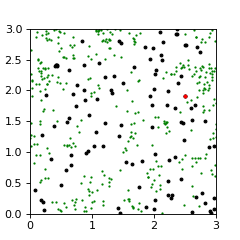

<IPython.core.display.Javascript object>


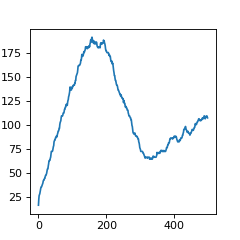

In [31]:
c = Const()
curve = model(c, show_dotses=True);
plt.figure(figsize=(3,3))
plt.plot(curve)